In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("F:\Online Retail.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data.InvoiceDate.dtype

dtype('<M8[ns]')

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data = data.drop('CustomerID',axis=1)

In [10]:
df = data.dropna(axis = 0,subset = ['Description'])

In [11]:
df.Quantity = df.Quantity.abs()
df.UnitPrice = df.UnitPrice.abs()

C:\Users\acer\AppData\Local\Temp\ipykernel_4608\275240391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quantity = df.Quantity.abs()
C:\Users\acer\AppData\Local\Temp\ipykernel_4608\275240391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.UnitPrice = df.UnitPrice.abs()


In [12]:
df.describe()


,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,11.225373,4.705391
std,217.930089,96.885686
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [13]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


In [14]:
df = df[df.UnitPrice > 0]

In [15]:
df['AmountSpent'] = df.Quantity * df.UnitPrice

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceWeekday'] = df['InvoiceDate'].dt.weekday

In [17]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,AmountSpent,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,2011,12,9,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011,12,9,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,9,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,9,4


In [18]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

freq = df.groupby('StockCode').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
}).rename(columns={'InvoiceDate': 'Recency'})


In [19]:
freq['Frequency'] = df.groupby('StockCode')['InvoiceNo'].nunique()
freq['Monetary'] = df.groupby('StockCode')['AmountSpent'].sum()
freq.head()

,Recency,Frequency,Monetary
StockCode,,,
10002,235,71,759.89
10080,18,22,119.09
10120,5,29,40.53
10123C,253,3,3.25
10124A,33,5,6.72


In [28]:
freq.to_csv('freq.csv',sep=',',index=True)

In [29]:
quantiles = freq.quantile(q=[0.25, 0.5, 0.75]).to_dict()

def rfm_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

freq['R'] = freq['Recency'].apply(rfm_score, args=('Recency', quantiles))
freq['F'] = freq['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
freq['M'] = freq['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

freq['RFM_Score'] = freq[['R', 'F', 'M']].sum(axis=1)
freq['GoodProduct'] = (freq['RFM_Score'] >= 9).astype(int)

In [30]:
from sklearn.model_selection import train_test_split


X = freq[['Recency', 'Frequency', 'Monetary']]
y = freq['GoodProduct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dtree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))


Logistic Regression Accuracy: 0.8747884940778342
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       832
           1       0.87      0.67      0.76       350

    accuracy                           0.87      1182
   macro avg       0.87      0.82      0.84      1182
weighted avg       0.87      0.87      0.87      1182

Logistic Regression Confusion Matrix:
 [[798  34]
 [114 236]]
Decision Tree Accuracy: 1.0
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       350

    accuracy                           1.00      1182
   macro avg       1.00      1.00      1.00      1182
weighted avg       1.00      1.00      1.00      1182

Decision Tree Confusion Matrix:
 [[832   0]
 [  0 350]]


<Axes: >

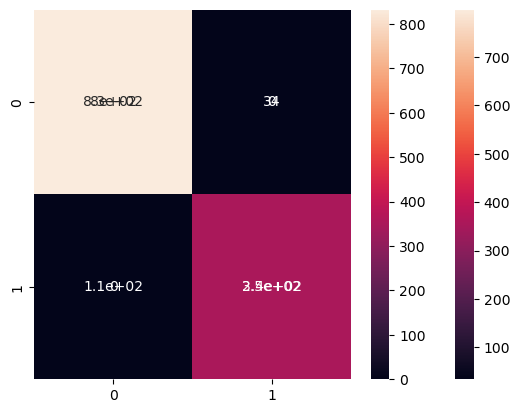

In [25]:
import seaborn as sns

cm_logreg = confusion_matrix(y_test,y_pred_logreg)
cm_dtree = confusion_matrix(y_test,y_pred_dtree)
sns.heatmap(cm_logreg,annot=True)
sns.heatmap(cm_dtree,annot=True)

In [31]:
freq['Predicted_GoodProduct'] = dtree.predict(freq[['Recency', 'Frequency', 'Monetary']])

In [32]:
freq

,Recency,Frequency,Monetary,R,F,M,RFM_Score,LoyalCustomer,Predicted_LoyalCustomer,GoodProduct,Predicted_GoodProduct
StockCode,,,,,,,,,,,
10002,235,71,759.89,4,3,3,10,1,1,1,1
10080,18,22,119.09,3,2,1,6,0,0,0,0
10120,5,29,40.53,3,2,1,6,0,0,0,0
10123C,253,3,3.25,4,1,1,6,0,0,0,0
10124A,33,5,6.72,4,1,1,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_20,39,9,167.05,4,1,2,7,0,0,0,0
gift_0001_30,99,7,175.53,4,1,2,7,0,0,0,0
gift_0001_40,135,3,100.70,4,1,1,6,0,0,0,0
